In [1]:
import os
import numpy as np
import PIL
from PIL import Image
from matplotlib import cm
import seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import multiprocessing
import time
import math
%matplotlib inline

In [2]:
RAD_id_test_list = os.listdir("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_test/")
print(len(RAD_id_test_list))

10000


In [3]:
RAD_id_train_list = os.listdir('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/')
print(len(RAD_id_train_list))

15000


In [4]:
def RAD_id_mean(train_or_test, RAD_id):
    mean_list = []
    if train_or_test == 'train':
        m = 61
    else:
        m = 31
    for k in range(m):
        mean_list.append(np.array(PIL.Image.open('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_%s/%s/%s_%03d.png'
                         % (train_or_test, RAD_id, RAD_id,
                        k))).astype(np.int8).ravel().mean())
    mean_list = np.array(mean_list)
    return math.log(mean_list.mean() + 2)

In [14]:
pool = multiprocessing.Pool()

In [11]:
def f_train(RAD_id):
    return RAD_id_mean('train', RAD_id)
start_time = time.time()
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))
map(f_train, RAD_id_train_list[:100])
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))
train_mean_list = list(pool.map(f_train, RAD_id_train_list))
print(time.strftime('end time: %Y-%m-%d %H:%M:%S', time.localtime()))
print(time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time)))

start time: 2018-08-30 01:10:48
end time: 2018-08-30 01:11:37
00:00:49


In [15]:
def f_test(RAD_id):
    return RAD_id_mean('test', RAD_id)
start_time = time.time()
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))
map(f_test, RAD_id_test_list[:100])
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))
test_mean_list = list(pool.map(f_test, RAD_id_test_list))
print(time.strftime('end time: %Y-%m-%d %H:%M:%S', time.localtime()))
print(time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time)))

start time: 2018-08-30 01:13:16
start time: 2018-08-30 01:13:16
end time: 2018-08-30 01:13:30
00:00:14


/home/hadoop/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


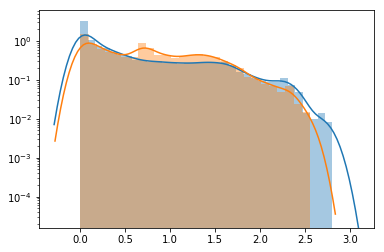

In [16]:
sns.distplot(train_mean_list, hist_kws={'log':True})
sns.distplot(test_mean_list, hist_kws={'log':True})

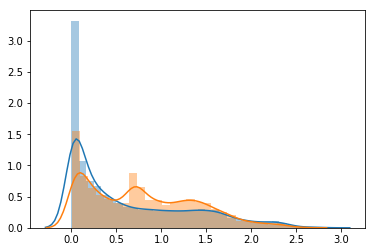

In [17]:
sns.distplot(train_mean_list)
sns.distplot(test_mean_list)

In [ ]:
a

In [29]:
def foo(x):
    if x % 2 == 0:
        return x
    else:
        return

In [ ]:
%%timeit
a = list(pool.map(foo, range(1000)))

In [33]:
a = list(map(foo, range(10)))

In [31]:
a = list(a)

In [34]:
a

[0, None, 2, None, 4, None, 6, None, 8, None]

In [35]:
[x for x in a if x is not None]

[0, 2, 4, 6, 8]